In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Fraud_dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
# Make sure your target column is named exactly as in your dataset
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Model Building

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Logistic Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")


Model: Logistic Regression
Confusion Matrix:
 [[200480      0]
 [   117      4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200480
         1.0       1.00      0.03      0.06       121

    accuracy                           1.00    200601
   macro avg       1.00      0.52      0.53    200601
weighted avg       1.00      1.00      1.00    200601

ROC AUC Score: 0.5165289256198347

Model: Random Forest
Confusion Matrix:
 [[200478      2]
 [    60     61]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200480
         1.0       0.97      0.50      0.66       121

    accuracy                           1.00    200601
   macro avg       0.98      0.75      0.83    200601
weighted avg       1.00      1.00      1.00    200601

ROC AUC Score: 0.7520611276737482

Model: XGBoost
Confusion Matrix:
 [[200375    105]
 [    95     26]]
              precision    recall  f1-score   supp

In [ ]:
#checking a model is working properly or not

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))


Confusion Matrix:
[[200375    105]
 [    95     26]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200480
         1.0       0.20      0.21      0.21       121

    accuracy                           1.00    200601
   macro avg       0.60      0.61      0.60    200601
weighted avg       1.00      1.00      1.00    200601

ROC AUC Score: 0.6071761450205457


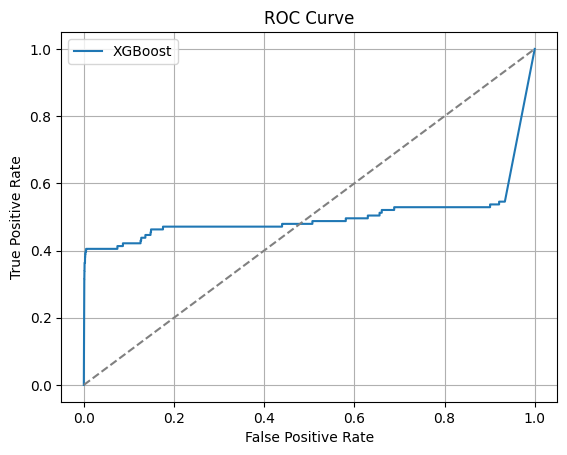

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
print("Sample Predictions:", y_pred_xgb[:10])
print("Actual Labels:     ", y_test.values[:10])


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]
Actual Labels:      [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
